#**1.Introduction**

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with Boston housing data, we will be using the sci-kit learns Boston dataset.In this dataset, each row describes a Boston town or suburb. There are 506 rows and 13 attributes (features) with a target

#**2. Method**



#The analysis follows the steps as below.

#**3.EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [ ]:
df['PRICE'] = boston.target 

In [ ]:
corr = df.corr()
corr.shape

(14, 14)

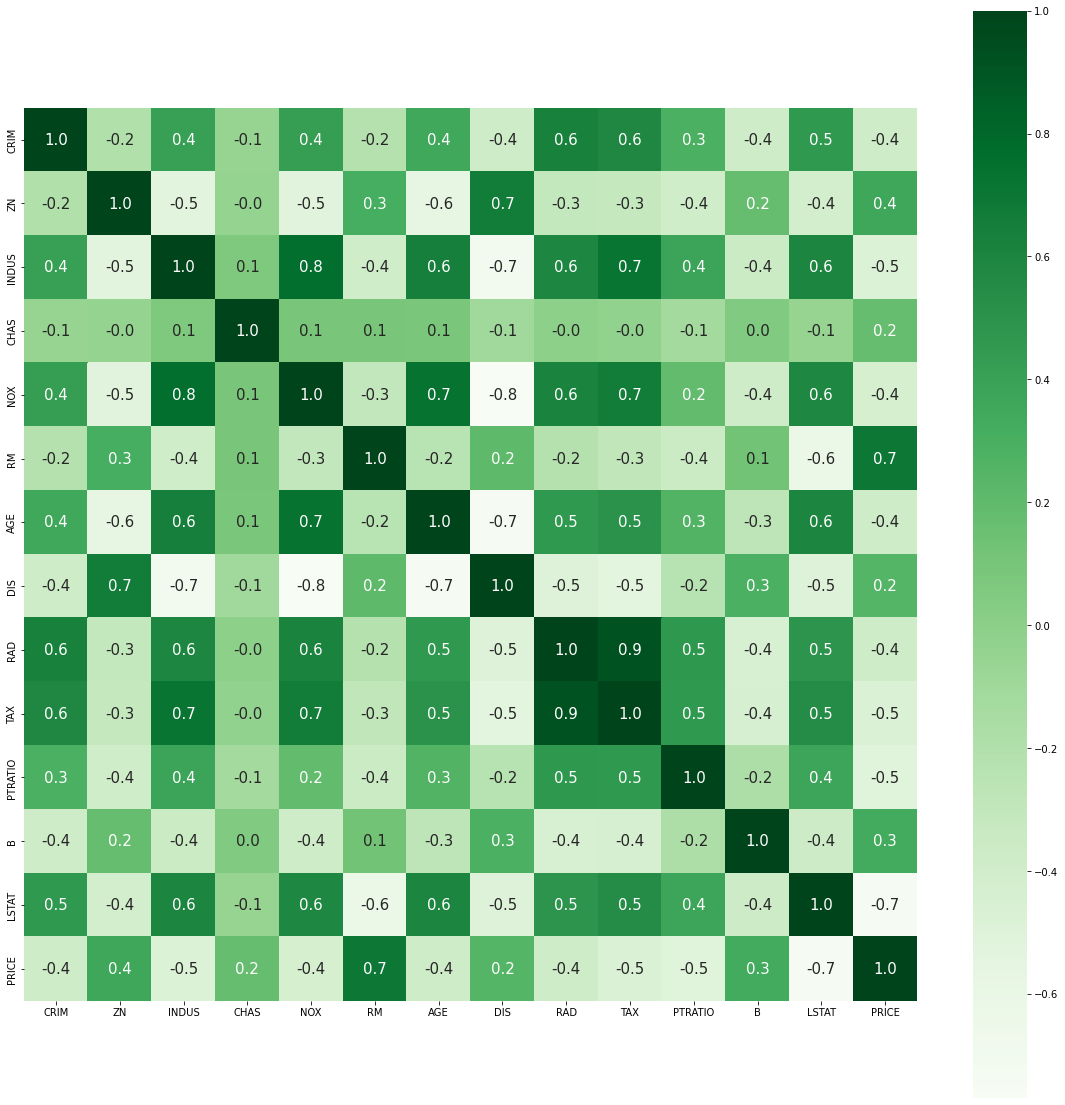

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
print(df.shape)

(506, 14)


In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


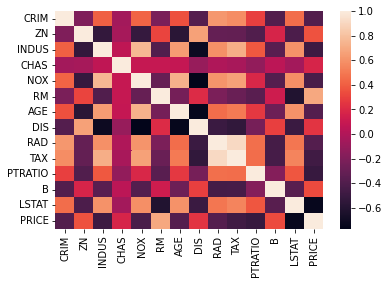

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

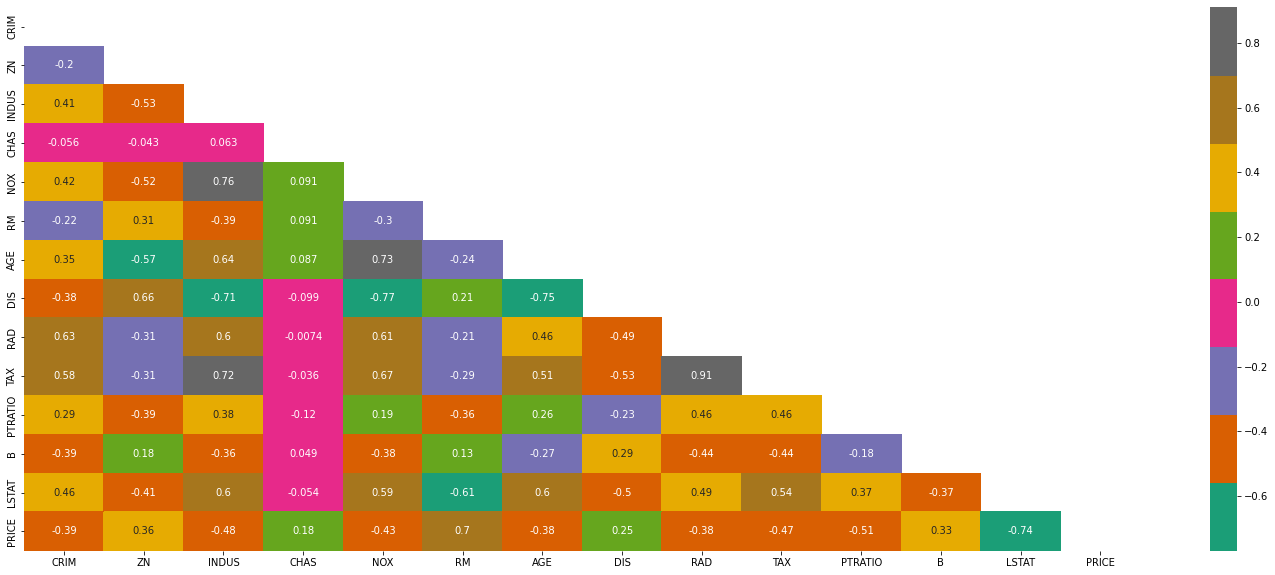

In [ ]:
plt.figure(figsize=(25, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [ ]:
df.fillna(df.mean(), inplace=True)

#**4. Analyze**

In [ ]:
x = df.drop(['PRICE'], axis=1)
y = df.loc[:,'PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

#4. First model Prediction Algorithms:


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
df = df.astype('float64')
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


##*1. Lasso Regression*


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

lasso = Lasso()
lasso.fit(xtrain, ytrain)
lasso_train_score = lasso.score(xtrain, ytrain)
lasso_test_score = lasso.score(xtest, ytest)
lasso_r2_score = r2_score(ytest, lasso.predict(xtest))
lasso_mae = mean_absolute_error(ytest, lasso.predict(xtest))
lasso_mse = mean_squared_error(ytest, lasso.predict(xtest))

##*2.  Linear Regression*


In [ ]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_train_score = lr.score(xtrain, ytrain)
lr_test_score = lr.score(xtest, ytest)
lr_r2_score = r2_score(ytest, lr.predict(xtest))
lr_mae = mean_absolute_error(ytest, lr.predict(xtest))
lr_mse = mean_squared_error(ytest, lr.predict(xtest))


##*3. Ridge regression*

---



In [ ]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)
ridge_train_score = ridge.score(xtrain, ytrain)
ridge_test_score = ridge.score(xtest, ytest)
ridge_r2_score = r2_score(ytest, ridge.predict(xtest))
ridge_mae = mean_absolute_error(ytest, ridge.predict(xtest))
ridge_mse = mean_squared_error(ytest, ridge.predict(xtest))

##*4. Ada Boost regressor*

---



In [ ]:
abr = AdaBoostRegressor()
abr.fit(xtrain, ytrain)
abr_train_score = abr.score(xtrain, ytrain)
abr_test_score = abr.score(xtest, ytest)
abr_r2_score = r2_score(ytest, abr.predict(xtest))
abr_mae = mean_absolute_error(ytest, abr.predict(xtest))
abr_mse = mean_squared_error(ytest, abr.predict(xtest))

##*5. Gradient Boosting Regressor*

---



In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)
gbr_train_score = gbr.score(xtrain, ytrain)
gbr_test_score = gbr.score(xtest, ytest)
gbr_r2_score = r2_score(ytest, gbr.predict(xtest))
gbr_mae = mean_absolute_error(ytest, gbr.predict(xtest))
gbr_mse = mean_squared_error(ytest, gbr.predict(xtest))

##*6.Random Forest Regressor*

---



In [ ]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
rfr_train_score = rfr.score(xtrain, ytrain)
rfr_test_score = rfr.score(xtest, ytest)
rfr_r2_score = r2_score(ytest, rfr.predict(xtest))
rfr_mae = mean_absolute_error(ytest, rfr.predict(xtest))
rfr_mse = mean_squared_error(ytest, rfr.predict(xtest))

##*7. Decision Tree Regressor*

---



In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
dtr_train_score = dtr.score(xtrain, ytrain)
dtr_test_score = dtr.score(xtest, ytest)
dtr_r2_score = r2_score(ytest, dtr.predict(xtest))
dtr_mae = mean_absolute_error(ytest, dtr.predict(xtest))
dtr_mse = mean_squared_error(ytest, dtr.predict(xtest))

##*8. XG Boost Regressor*

---



In [ ]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
xgb_train_score = xgb.score(xtrain, ytrain)
xgb_test_score = xgb.score(xtest, ytest)
xgb_r2_score = r2_score(ytest, xgb.predict(xtest))
xgb_mae = mean_absolute_error(ytest, xgb.predict(xtest))
xgb_mse = mean_squared_error(ytest, xgb.predict(xtest))

[12:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


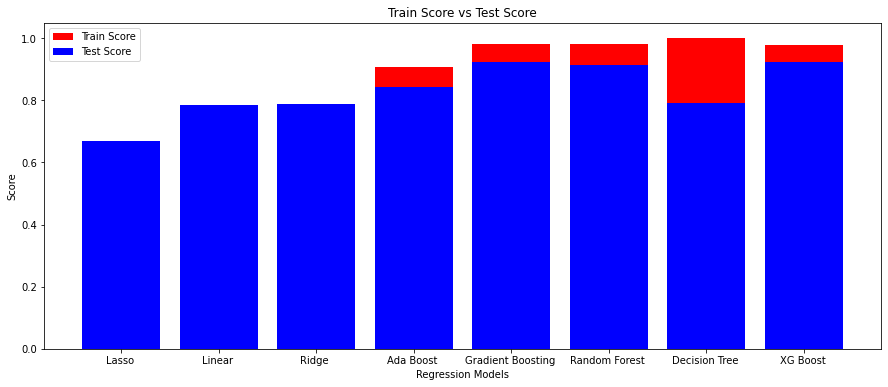

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score], color="red", label="Train Score")
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_test_score, lr_test_score, ridge_test_score, abr_test_score, gbr_test_score, rfr_test_score, dtr_test_score, xgb_test_score], color="blue", label="Test Score")
plt.legend()
plt.title("Train Score vs Test Score")
plt.xlabel("Regression Models")
plt.ylabel("Score")
plt.show()

In [ ]:
names = ['Lasso','LinReg','Reidge','ADABoost','GradientBoost','RandomForest','DecisionTree','XGBoost']
score =[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score]

In [ ]:
scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

In [ ]:
scores

,Algorithm Name,Score
0,Lasso,0.642627
1,LinReg,0.710388
2,Reidge,0.706372
3,ADABoost,0.907752
4,GradientBoost,0.981873
5,RandomForest,0.979993
6,DecisionTree,1.000000
7,XGBoost,0.977409


In [ ]:
models = pd.DataFrame({
    'Model': ['Lasso'	,'LinReg'	,'Reidge'	,'ADABoost'	,'GradientBoost'	,'RandomForest'	,'DecisionTree'	,'XGBoost'],
    'R-squared Score': [lasso_r2_score*100,ridge_r2_score*100,abr_r2_score*100,gbr_r2_score*100,rfr_r2_score*100,dtr_r2_score*100,xgb_r2_score*100,lr_r2_score*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
3,ADABoost,92.422636
6,DecisionTree,92.317929
4,GradientBoost,91.221228
2,Reidge,84.203509
5,RandomForest,79.217071
1,LinReg,78.905107
7,XGBoost,78.362954
0,Lasso,66.947829
